In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

In [14]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    """
    inputs: tensorflow object
    in_size: input size
    out_size: output size
    activation_function: activation function used at the end of this layer
    """
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

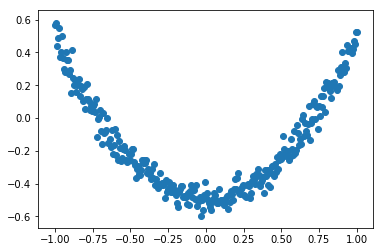

In [15]:
# Make up some real data
x_data = np.linspace(-1, 1, 300)[:, np.newaxis] #reshape to (300,1)
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

plt.scatter(x_data, y_data)

In [16]:
x_data.shape

(300, 1)

In [17]:
# define placeholder for input to network
xs = tf.placeholder(tf.float32, [None, 1])  #None means it can accept any number of samples, 1 features
ys = tf.placeholder(tf.float32, [None, 1])

In [18]:
# add hidden layer
#1 input 10 output neurons
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)  


In [19]:
l1.shape

TensorShape([Dimension(None), Dimension(10)])

In [20]:
# add output layer
prediction = add_layer(l1, 10, 1, activation_function=None)

In [24]:
prediction.shape

TensorShape([Dimension(None), Dimension(1)])

In [25]:
# the error between prediction and real data
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction), axis=[1]))
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [26]:
#important step
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


<IPython.core.display.Javascript object>


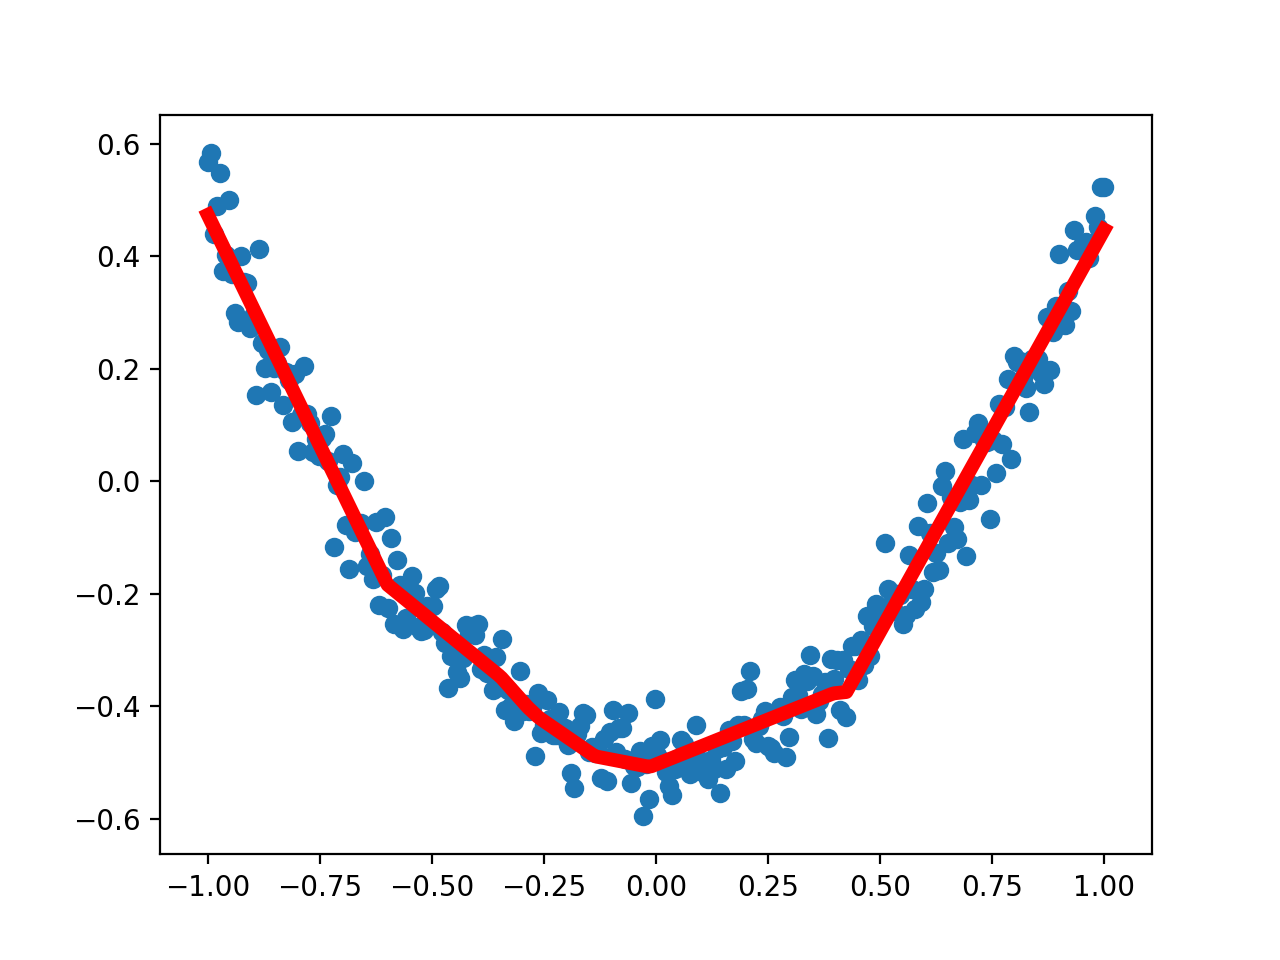

In [35]:
# plot the real data
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()


for i in range(1000):
    # training
    sess.run(train, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
#         # to visualize the result and improvement
#         try:
#             ax.lines.remove(lines[0])
#         except Exception:
#             pass
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        # plot the prediction
        ax.clear()
        ax.scatter(x_data, y_data)
        ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(.4)
        fig.canvas.draw()

In [38]:
sess.run(loss, feed_dict={xs: x_data, ys: y_data})

0.0027156547